In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Results using discount factor of 0.9

In [2]:
policy = np.load('policy.npy')
state_values = np.load('state_values.npy')

In [3]:
sns.set_theme()
sns.color_palette("viridis", as_cmap=True)

Text(0.5, 1.0, 'heatmap depicting what are the best policy actions in each state')

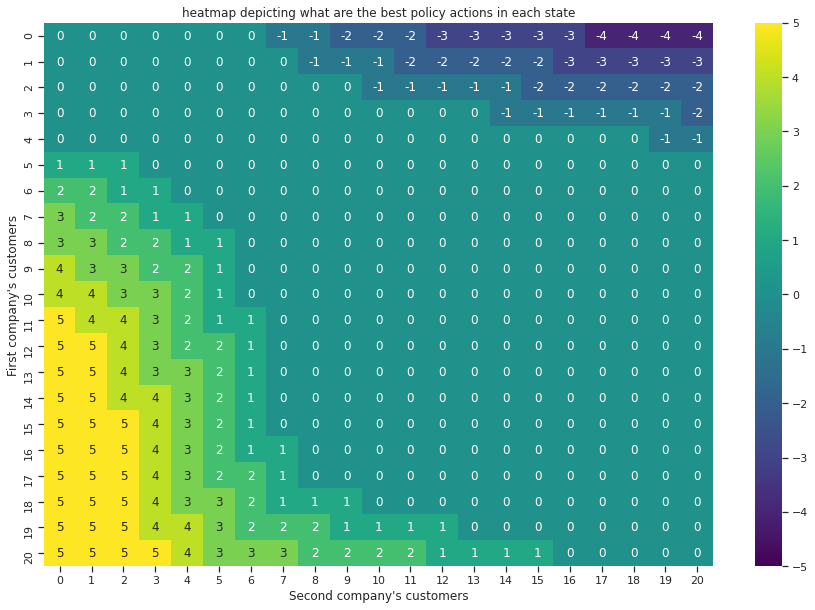

In [5]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111)

sns.set_style("ticks")
h = sns.heatmap(policy, vmin=-5, vmax=5, cmap='viridis', ax=ax, 
                cbar_kws={'ticks': np.arange(-5, 6)}, annot=True)
h.set(xlabel='Second company\'s customers', ylabel='First company\'s customers')
h.set_title('heatmap depicting what are the best policy actions in each state')

As you can see in the depicted heatmap from transitions from states and optimal policy, and also considering the higher degree of requests in one company over another, results show us that it is much more preferable to transfer customers from the first company to the second one. Also we can see that this preference doesn't show any symptom of bias to affect all the states. The observation from the heatmap that almost more than half of the states don't need any transitions can account for this statement. To delve deeper into this phenomenon, we can allude to the parameters which specify what are the rate of customer returns and requests. As we set the rate of requests more than the rate of returns for the second company, it would be more reasonable to just transfer the capacity we got to the second company and just mitigate the possibility of getting depleted in that specific branch.

In [6]:
from matplotlib.colors import Normalize
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [7]:
norm = Normalize(np.min(state_values.flatten()), np.max(state_values.flatten()))

In [8]:
state_values.shape

(21, 21)

In [9]:
N = state_values.shape[0]
x, y = np.meshgrid(range(N), range(N))

Text(0.5, 0.92, "3D map depicting the values we've estimated for each state")

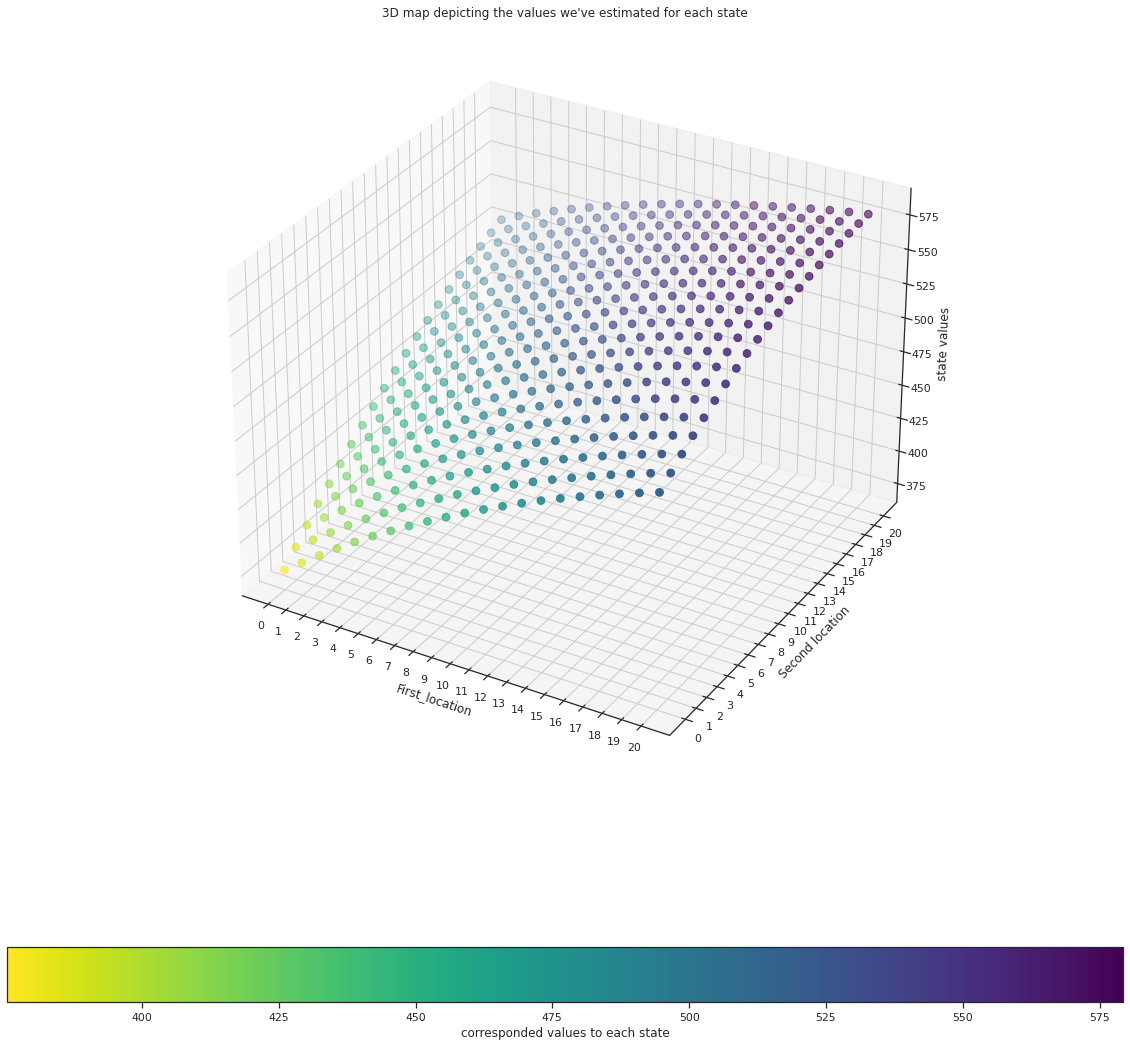

In [14]:
df=pd.DataFrame({'X': x.flatten(), 'Y': y.flatten(), 
                 'Z': state_values.flatten()})
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c=norm(state_values.flatten()), s=60, cmap='viridis_r')
ax.set_xlabel('First_location')
ax.set_ylabel('Second location')
ax.set_zlabel('state values')
ax.set_xticks(np.arange(0, 21))
ax.set_yticks(np.arange(0, 21))
# color_map = mpl.cm.cool 
plt.colorbar(mpl.cm.ScalarMappable(norm = norm, 
               cmap = 'viridis_r'), orientation ='horizontal', 
               label ='corresponded values to each state')
plt.title('3D map depicting the values we\'ve estimated for each state')

#### Results using discount factor of 1

In [29]:
policy = np.load('policy_gamma1.npy')
state_values = np.load('state_values_gamma1.npy')

Text(0.5, 1.0, 'heatmap depicting what are the best policy actions in each state')

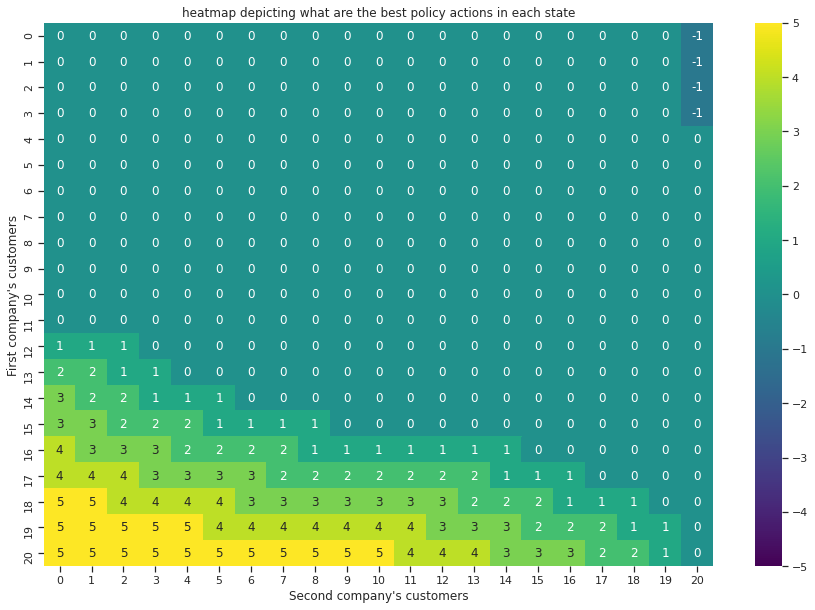

In [30]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111)

sns.set_style("ticks")
h = sns.heatmap(policy, vmin=-5, vmax=5, cmap='viridis', ax=ax, 
                cbar_kws={'ticks': np.arange(-5, 6)}, annot=True, fmt='1g')
h.set(xlabel='Second company\'s customers', ylabel='First company\'s customers')
h.set_title('heatmap depicting what are the best policy actions in each state')

In this part, we set the discount factor with the magnitude of 1. This makes the agent to just be more far-sighted in some manner. To explain what is going on in our case, considering the higher rate of requests than returns in the second company, The agent is carefully choosing to transfer capacity from the first company to the second one a little more rigorous than the previous settings which had discount factor of 0.9
You can see that the agent acts more stricter to make it more probable to get into states with more state-values which are states which have more concentration of capacity in the second company.

In [31]:
norm = Normalize(np.min(state_values.flatten()), np.max(state_values.flatten()))

In [32]:
N = state_values.shape[0]
x, y = np.meshgrid(range(N), range(N))

Text(0.5, 0.92, "3D map depicting the values we've estimated for each state")

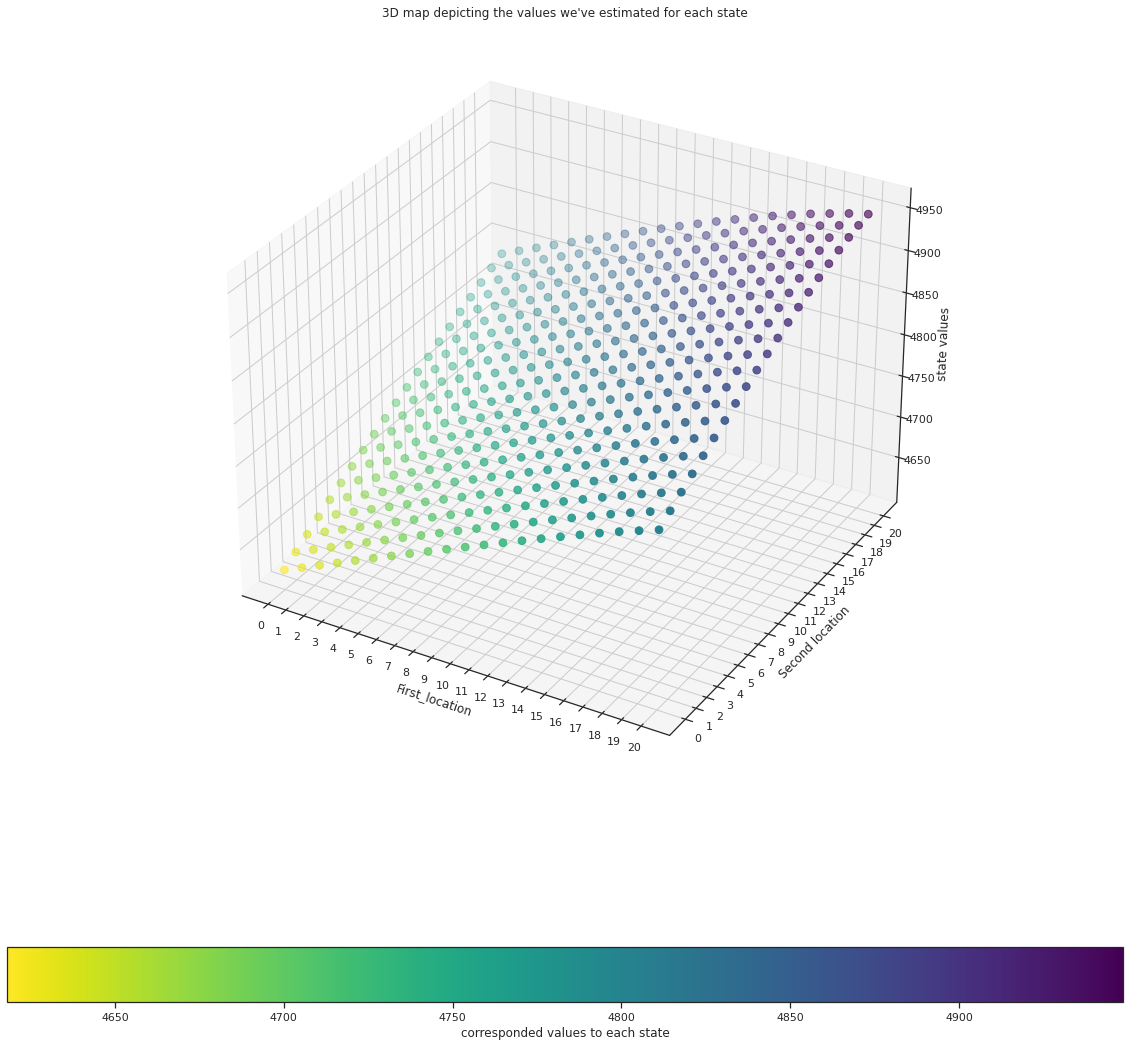

In [33]:
df=pd.DataFrame({'X': x.flatten(), 'Y': y.flatten(), 
                 'Z': state_values.flatten()})
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c=norm(state_values.flatten()), s=60, cmap='viridis_r')
ax.set_xlabel('First_location')
ax.set_ylabel('Second location')
ax.set_zlabel('state values')
ax.set_xticks(np.arange(0, 21))
ax.set_yticks(np.arange(0, 21))
# color_map = mpl.cm.cool 
plt.colorbar(mpl.cm.ScalarMappable(norm = norm, 
               cmap = 'viridis_r'), orientation ='horizontal', 
               label ='corresponded values to each state')
plt.title('3D map depicting the values we\'ve estimated for each state')

To justify our statement for the previous heatmap, you can see in this 3d map that the state-values are much more accurate and that is because of our higher discount factor and higher degree of being far-sighted.

#### Results using punishment of magnitude 6 and discount factor of 0.9

In [21]:
policy = np.load('policy_punish6.npy')
state_values = np.load('state_values_punish6.npy')

Text(0.5, 1.0, 'heatmap depicting what are the best policy actions in each state')

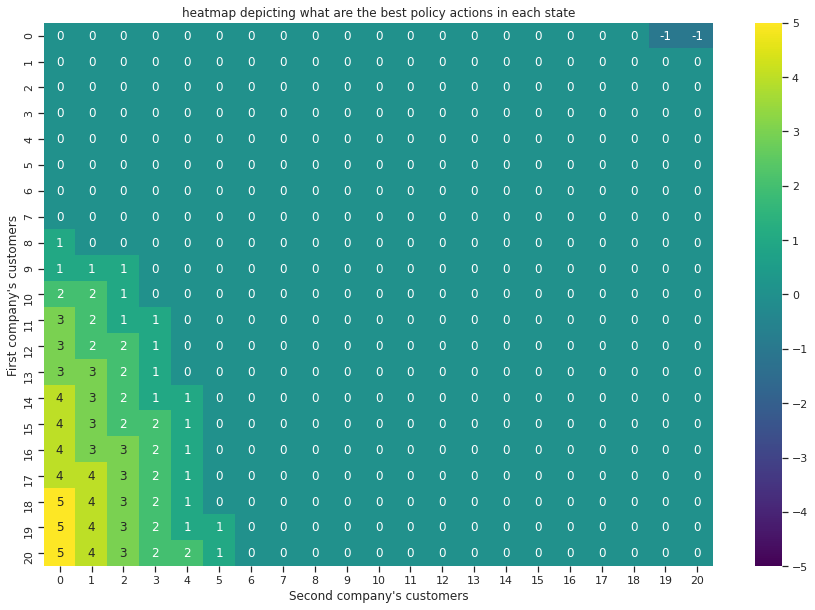

In [25]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111)

sns.set_style("ticks")
h = sns.heatmap(policy, vmin=-5, vmax=5, cmap='viridis', ax=ax, 
                cbar_kws={'ticks': np.arange(-5, 6)}, annot=True, fmt='1g')
h.set(xlabel='Second company\'s customers', ylabel='First company\'s customers')
h.set_title('heatmap depicting what are the best policy actions in each state')

The most conspicuous matter about this heatmap is that the transitions are somehow confined. With our observations of less transitions, we can justify this observations with the fact that the punishment for transitions are more than the default setting which we experimented before. To get the intuition behind this phenomenon, you can think of it as the agent is preventing getting charged too much for transferring capacity between companies.

In [26]:
norm = Normalize(np.min(state_values.flatten()), np.max(state_values.flatten()))

In [27]:
N = state_values.shape[0]
x, y = np.meshgrid(range(N), range(N))

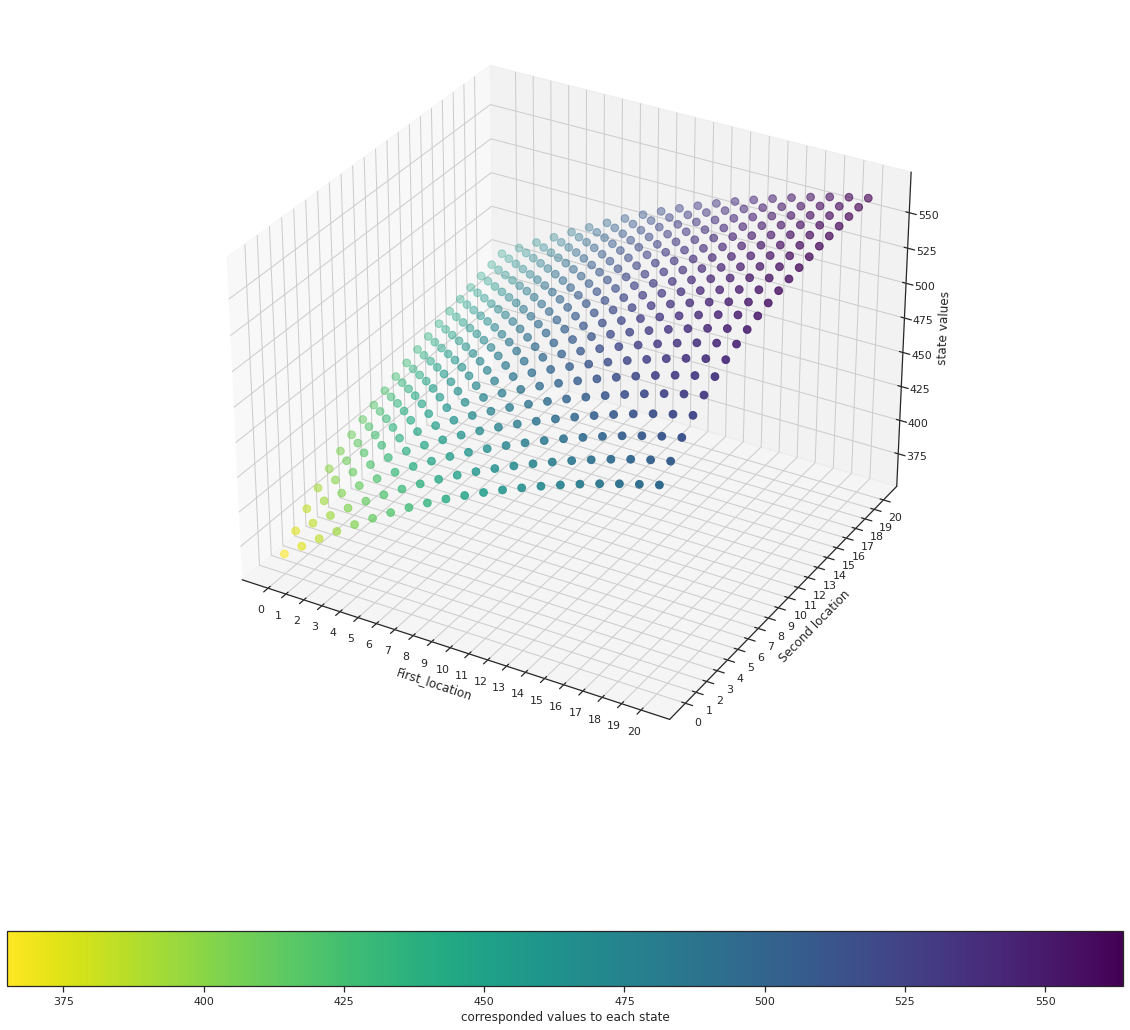

In [28]:
df=pd.DataFrame({'X': x.flatten(), 'Y': y.flatten(), 
                 'Z': state_values.flatten()})
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c=norm(state_values.flatten()), s=60, cmap='viridis_r')
ax.set_xlabel('First_location')
ax.set_ylabel('Second location')
ax.set_zlabel('state values')
ax.set_xticks(np.arange(0, 21))
ax.set_yticks(np.arange(0, 21))
# color_map = mpl.cm.cool 
plt.colorbar(mpl.cm.ScalarMappable(norm = norm, 
               cmap = 'viridis_r'), orientation ='horizontal', 
               label ='corresponded values to each state')